<a href="https://colab.research.google.com/github/NguyenThien19146131/Thien/blob/main/mnist_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11501568/11490434 [==============================] - 0s 0us/step


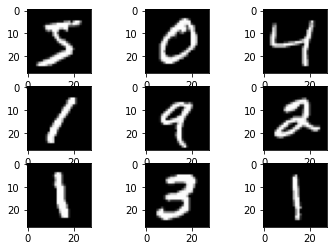

In [ ]:
from keras.datasets import mnist
from numpy.ma.core import correlate
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

(x_train,y_train),(x_test,y_test)=mnist.load_data()

for i in range (9):
     plt.subplot(330+i+1)
     plt.imshow(x_train[i],cmap=plt.get_cmap('gray'))
     
plt.show()     

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
from tensorflow.keras.utils import to_categorical
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train/=255
x_test/=255
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [ ]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout

model=Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='RMSprop',metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping
history=model.fit(x_train,y_train,batch_size =128, epochs =100,verbose =1,validation_data=(x_test,y_test))

Epoch 1/100
469/469 [==============================] - 9s 20ms/step - loss: 0.0161 - accuracy: 0.9963 - val_loss: 0.1551 - val_accuracy: 0.9844
Epoch 2/100
469/469 [==============================] - 8s 17ms/step - loss: 0.0161 - accuracy: 0.9964 - val_loss: 0.1587 - val_accuracy: 0.9827
Epoch 3/100
469/469 [==============================] - 8s 17ms/step - loss: 0.0151 - accuracy: 0.9968 - val_loss: 0.1646 - val_accuracy: 0.9832
Epoch 4/100
469/469 [==============================] - 8s 17ms/step - loss: 0.0154 - accuracy: 0.9966 - val_loss: 0.1552 - val_accuracy: 0.9819
Epoch 5/100
469/469 [==============================] - 8s 17ms/step - loss: 0.0142 - accuracy: 0.9970 - val_loss: 0.1713 - val_accuracy: 0.9819
Epoch 6/100
469/469 [==============================] - 8s 17ms/step - loss: 0.0144 - accuracy: 0.9970 - val_loss: 0.1810 - val_accuracy: 0.9836
Epoch 7/100
469/469 [==============================] - 8s 17ms/step - loss: 0.0131 - accuracy: 0.9972 - val_loss: 0.1695 - val_accuracy:

In [ ]:
model.save('/content/sample_data/ mnist_ANN.h5')

In [ ]:
from tensorflow import keras
model=keras.models.load_model('/content/sample_data/fashion_CNN.h5')

In [11]:
score = model.evaluate(x_test, y_test, verbose=1)

print('\n', 'Test loss:', score[0])
print('\n', 'Test accuracy:', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0927 - accuracy: 0.9819

 Test loss: 0.0927300974726677

 Test accuracy: 0.9818999767303467


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  


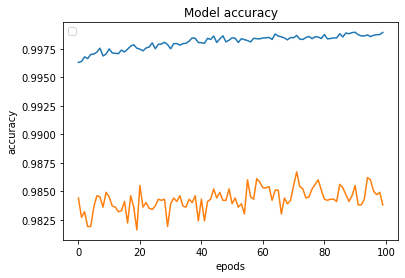

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epods')
plt.legend('train',['validation'],loc='upper left')
plt.show()